
# COVID-19 - Clinical Data to assess diagnosis

## Introdução

O Brasil registrou o primeiro caso de COVID-19 em 26 de fevereiro de 2020 e chegou à registrar transmissão comuntária no dia 20 de março do mesmo ano.

A pandemia pelo Covid-19 impactou todo o mundo, sobrecarregando o sistema de saúde, que estava despreparado para uma necessidade altíssima de uso de leitos de UTI, para a quantidade de equipamentos de proteção individual, assim como também sobrecarregou a carga de trabalho de profissionais da saúde que além de estarem trabalhando muito mais do que em situações "comuns", estão fazendo um trabalho de altíssimo risco.

Há então uma urgência em realizar predições que preparem o sistema de saúde para evitar um colapso, - assumindo que pode ser necessário a ocupação de mais leitos de UTI do que o que existe hoje (levando em consideração que existam profissionais, recursos e equipamentos de proteção para todos) - usando dados clinicos e demográficos dos individuos.

A imagem abaixo ilustra bem o motivo pela qual há a necessidade de medidas de proteção. Nesse sentido, esse trabalho pretende tornar mais inteligente a tomada de decisão por trás da internação de pessoas, assim podendo otimizar a quantidade de leits de UTI usados.     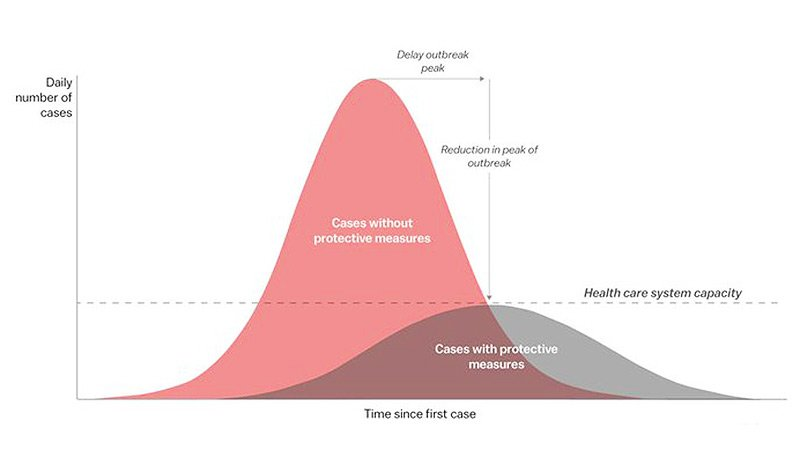

Informações retiradas de: [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

## Sobre a Base de Dados

Esse dataset contem dados anonimizados dos hospitais Sirio-Libanês de São Paulo e de Brasilia. Todos os dados foram anonimizados seguindo as melhores práticas e recomendações nacionais. Além disso, os dados foram limpos e escalados por coluna de acordo com o Min Max Scaler para estarem dentro de um padrão entre -1 e 1.

Um conceito importante trazido nesse dataset é o de **WINDOWS**:

| Window/Intervalo| Descrição |
| --- | --- |
| 0-2 | de 0 à 2 horas da admissão |
| 2-4 | de 2 à 4 horas da admissão |
| 4-6 | de 4 à 6 horas da admissão |
| 6-12 | de 6 à 12 horas da admissão |
| Above-12 | Acima de 12 horas da admissão |


<h2>O que isso significa?</h2>

Para facilitar a compreensão e evolução dos casos, esses intervalos trazem as informações referentes ao que aconteceu com o paciente naquele intervalo, ou seja, os resultados de testes realizados naquele intervalo, os sinais vitais, se ele foi internado na UTI (ou não).

- Um cuidado que deve ser tomado é que quando a variavel destino for atingida (a entrada da pessoa na UTI), os dados daquele intervalo não devem ser usados, pois não se sabe a ordem dos eventos, uma vez que talvez a internação aconteceu antes da realização dos testes. As imagens abaixo exemplificam melhor esses casos:

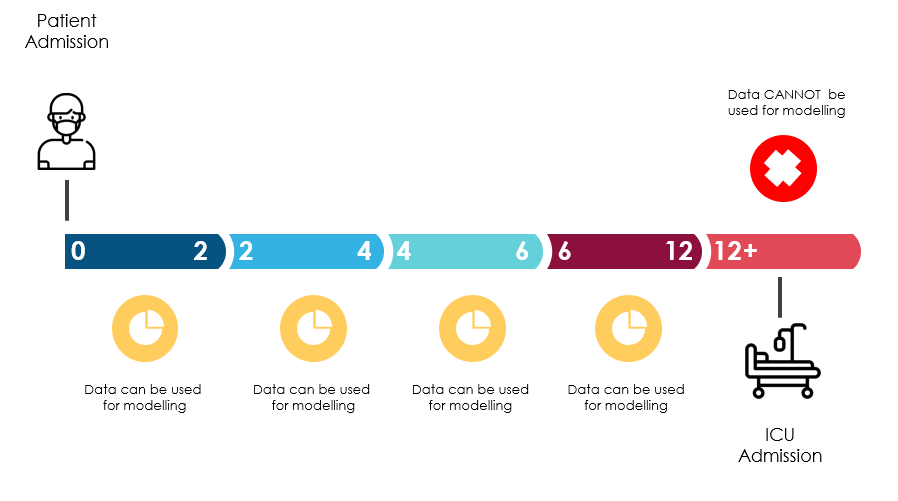

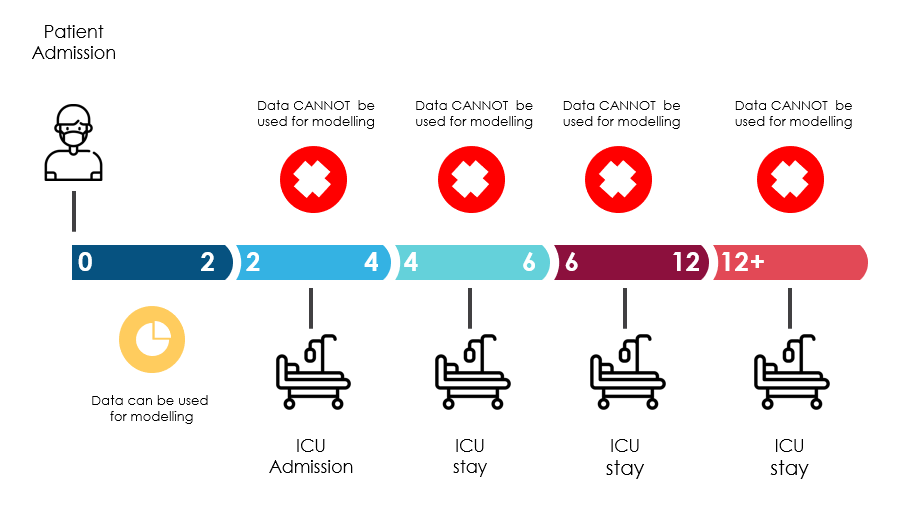

Informações retiradas de: [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

## Objetivo

O projeto tem dois objetivos principais: 
1. Dos casos confirmados de COVID-19, predizer quem será admitido à UTI.
2. Dos casos confirmados de COVID-19, predizer quem NÃO será admitido à UTI.


<h2>Tarefa 1</h2>
Baseando-se nos dados existentes, é possível predizer quais pacientes precisarão de suporte da Unidade de Tratamento Intensivo(UTI)? O objetivo é prover à hospitais de atendimento terciário e quaternário com a resposta mais correta possível, para que seja possível que os recursos de UTI possam ser organizados e/ou pacientes possam ser transferidos com mais facilidade. Além disso, uma das ideias é 

<h2>Tarefa 2</h2>
Baseando na amostra selecionada dos dados, é possível predizer quais pacientes não precisarão do suporte de UTI? Nessa tarefa, o objetivo é dar à hospitais locais uma resposta boa o suficiente, para que então trabalhadores da saúde de linha de frente possam seguramente liberar os pacientes e acompanhar a evolução de forma remota.

Informações retiradas de: [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

## Importação da base e bibliotecas

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 12.0MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 1.7MB 45.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0MB 40.4MB/s 
     |████████████████████████████████| 245kB 45.4MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 215kB 44.7MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 6.8MB 43.7MB/s 
     |████████████████████████████████| 276kB 47.3MB/s 
     |████████████████████████████████| 14.2MB 298kB/s 
     |████████████████████████████████| 1.1MB 37.9MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 3.2MB 46.8MB/s 
     |████████████████████████████████| 1.2MB 37.4MB/

In [ ]:
from pycaret.classification import *

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import (GradientBoostingClassifier, 
                              RandomForestClassifier, 
                              ExtraTreesClassifier)
from sklearn.model_selection import (cross_validate, RepeatedStratifiedKFold, StratifiedKFold, 
                                     train_test_split, RandomizedSearchCV, GridSearchCV)

from yellowbrick.features import FeatureImportances
from yellowbrick.classifier import (ROCAUC, PrecisionRecallCurve,
                                    ClassificationReport, ClassPredictionError,
                                    DiscriminationThreshold)
from yellowbrick.model_selection import LearningCurve

In [ ]:
base = "https://github.com/Brunomatarucco/Covid-clinical-data/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true"

dados = pd.read_excel(base)

## Tratamento de dados

In [ ]:
## Mostrar dados aletatórios para enteder melhor como os dados estão dispostos

dados.sample(8)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
452,90,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
dados.describe()

# A ideia aqui é verificar o "count" para ver quantos dados temos que são NaN

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821

<h3> NaN = significa Not a Number, é uma forma comum de representar a falta de dado. </h3>

In [ ]:
  dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


Pela grande quantidade de colunas, não foi possível verificar exatamente quais colunas tem dados NaN

Nesse momento vou começar a entender como estão dispostos sos dados e como os valores NaN estão se comportando nesse DataFrame

In [ ]:
## Das outras formas não foi muito possível verificar as quantidade de NaN, então optei por contabilizar nesse momento

qtde_total_colunas = dados.shape[1]
nan_cols = [i for i in dados.columns if dados[i].isnull().any()]
print(f"Quantidade total de colunas do DataFrame: {qtde_total_colunas}")
print(f"Quantidade total de colunas com valores NaN: {len(nan_cols)}")
print(f"Quantidade total de colunas sem valores NaN: {qtde_total_colunas - len(nan_cols)}")
print(f"Quantidade total de valores NaN: {dados.isna().sum().sum()}")

Quantidade total de colunas do DataFrame: 231
Quantidade total de colunas com valores NaN: 225
Quantidade total de colunas sem valores NaN: 6
Quantidade total de valores NaN: 223863


In [ ]:
# a ideia dessa linha de código é selecionar somente as colunas com algum valor NaN e mostrar algumas linhas aleatórias desses dados.

dados.loc[dados.isna().any(axis=1)].sample(8, random_state = 8979)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
278,55,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Foi possivel ver que a maior parte dos NaNs são dos resultados de exames clinicos dessas pessoas
#vou verificar uma pessoa só que tenha valores NaN para ver como são os valores NaN se comportam em paciente só

dados[dados["PATIENT_VISIT_IDENTIFIER"]==26]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
130,26,0,20th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,-0.93895,-0.93895,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.357143,0.357143,0.357143,0.357143,-1.0,-0.913659,-0.913659,-0.913659,-0.913659,-1.0,-0.742004,-0.742004

Aqui vemos uma situação que já era esperada quando vi os dados NaN. Que os valores númericos são colocados somente no intervalo que os pacientes recebem o resultado do exame clinico.

O próprio Sirio-Libanês levanta esse ponto e traz uma solução:

"*Problema: Um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia de acordo com diferentes tipos de medidas.* *Por exemplo, sinais vitais são mensurados com mais frequencia (geralmente de hora em hora)* *que amostragem de sangue (geralmente são diários).*

*Dicas: É razoavel assumir que um paciente que não tem um resultado medido em uma janela de tempo está clinicamente estável, potencialmente apresentando sinais vitais e resultados de sangue parecidos com intervalos próximos. Então, é possível preencher os valores vazios usando resultados de testes de intervalos próximos.[...]"*

In [ ]:
### A ideia dessa função é preencher as colunas que tem dados NaN usando os resultados de testes de intervalos próximos ###

#PS: Importante que foi levado em consideração o que foi dito na introdução sobre uso de dados de pessoas internadas na UTI#

# Para isso feita uma diferenciação dos dados, o que foi feito foi um forward fill dos NaN
#sem nenhum tratamento, assim, sempre que houvessem dados NaN à frente de dados preenchidos eles seriam preenchidos,
#assim, seria possível preencher vários campos NaN já. Outro ponto muito relevante é que os resultados de testes de quando as pessoas 
#estivessem na UTI não poderiam ser utilizados, então, fiz um outro tratamento em que retirei temporariamente todos as linhas de pessoas que entraram na UTI
#e realizei um backfill, assim, preenchendo os dados NaN com os resultados posteriores, sem usar os dados de quando as pessoas entraram na UTI.

def preenche_tabela(dados):
  features_continuas_colunas = dados.iloc[:,13:-2].columns
  dados_temp = dados.copy()
  index_ICU = dados[dados['ICU'] == 1].index
  dados_temp.drop(index=index_ICU, inplace=True)
  features_continuas_temp = dados_temp.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[features_continuas_colunas].fillna(method="ffill").fillna(method='bfill')
  features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[features_continuas_colunas].fillna(method="ffill")
  features_continuas.update(features_continuas_temp, overwrite = True)
  features_categoricas = dados.iloc[:,:13]
  saida = dados.iloc[:,-2:]
  dados_finais = pd.concat([features_categoricas, features_continuas, saida],ignore_index=True, axis=1)
  dados_finais.columns = dados.columns
  return dados_finais

In [ ]:
dados_limpos = preenche_tabela(dados)
dados_limpos.head(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-1.0,-0.868365,-0.868365,-0.

In [ ]:
dados_limpos.isna().sum().sum()

6333

In [ ]:
# Aqui são retirados os pacientes que logo no primeiro periodo são levados à UTI 

a_remover = dados_limpos.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query('PATIENT_VISIT_IDENTIFIER not in @a_remover')
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1765.000000,1765.000000,1765.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.0,1763.000000,1763.000000,1763.000000,1763.000000,1763.0,1763.000000,1763.000000,1763.000000,1763.000000,1763.0,1763.000000,1763.000000,1763.000000,1763.000000,1763.0,1763.000000,1763.000000,1763.000000,1763.000000,1763.0,1

In [ ]:
# Nessa parte, a função é para preparar os dados para de fato serem estudados
#estou avaliando se a pessoa foi para UTI em algum momento e selecionando
#somente os dados do primeiro periodo da pessoa. Assim é possível tentar prever
#assim que a pessoa entra, se ela precisará de UTI.

def prepare_window(rows):
  if (np.any(rows['ICU'])):
    rows.loc[rows['WINDOW']=='0-2', 'ICU'] = 1
  return rows.loc[rows["WINDOW"]=="0-2"]

dados_limpos = dados_limpos.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window)

In [ ]:
dados_limpos.reset_index(drop=True, inplace=True)

In [ ]:
# Verificar agora quais são os dados NaN ainda existentes

dados_limpos[dados_limpos.isna().any(axis = 1)]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
183,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,-0.93895,-0.93895,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.357143,0.357143,0.357143,0.357143,-1.0,-0.881104,-0.881104,-0.881104,-0.881104,-1.0,-0.742004,-0.74200

In [ ]:
# Como somente uma pessoa apresentou dados NaN, ele será retirado do DataFrame.
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER != 199").copy()

In [ ]:
dados_limpos[dados_limpos.isna().any(axis = 1)]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU


Não tem mais nenhum valor NaN no DataFrame.

O passo agora é para ver quais colunas apresentam valores não-númericos, pois para poder fazer um estudo proposto de classificação não é possível utilizar dados string.

In [ ]:
colunas_numericas = dados_limpos.describe().columns
for coluna in dados_limpos.columns:
  if coluna not in colunas_numericas:
    print(coluna)

AGE_PERCENTIL
WINDOW


A coluna AGE_PERCENTIL traz as informações de idade. Para poder preservar o anonimato dos participantes não fica claro sobre o que exatamente se refere o range de idades. Mas sabe-se que quanto maior o age percentil, maior a idade da pessoa. 

In [ ]:
dados_limpos['AGE_PERCENTIL'] = dados_limpos['AGE_PERCENTIL'].astype('category').cat.codes
dados_limpos.head(3)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-1.0,-0.868365,-0.868365,-0.868365,-0.868365,-1.0,-0.742004,-0.742004,-

In [ ]:
# Agora que AGE_PERCENTIL é um dado categórico, a ideia é tirar a coluna WINDOW,
#já que essa coluna é igual em todos os pacientes.

dados_limpos.drop(columns="WINDOW", inplace=True)

In [ ]:
for coluna in dados_limpos.columns:
  if coluna not in colunas_numericas:
    print(coluna)

AGE_PERCENTIL


Não tem mais valores não númericos no DataFrame.

## Análise exploratória

Nesse momento o data frame já contempla somente os dados de pacientes 

In [ ]:
print("São {} pacientes que tem seus dados aqui dispostos para o estudo.".format(len(dados_limpos.PATIENT_VISIT_IDENTIFIER.unique())))

São 352 pacientes que tem seus dados aqui dispostos para o estudo.


In [ ]:
dados_limpos['ICU'].value_counts().rename(index = {0:"Não-UTI", 1:"UTI"})

Não-UTI    189
UTI        163
Name: ICU, dtype: int64

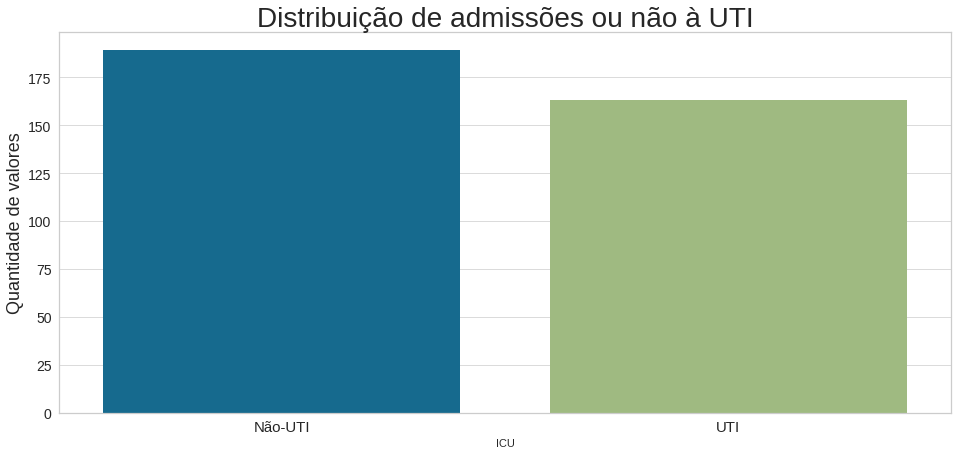

In [ ]:
plt.figure(figsize=(16,7))
plt.title("Distribuição de admissões ou não à UTI", fontsize = 28)
sns.countplot(x = dados_limpos['ICU'])
plt.grid(axis = 'y', alpha= 0.7)
plt.yticks(fontsize = 14)
plt.xticks([0,1],['Não-UTI',"UTI"], fontsize = 15)
plt.ylabel("Quantidade de valores", fontsize = 18)
plt.show()

A quantidade de pessoas que não foram e que foram para UTI são parecidas: 
- São 189 pessoas que não foram para UTI;
- São 163 pessoas que foram para UTI.

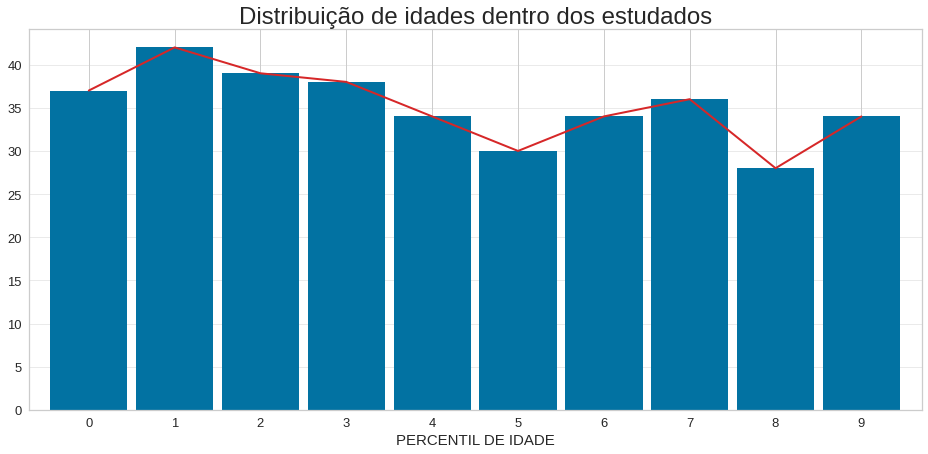

In [ ]:
plt.figure(figsize=(16,7))
dados_limpos.value_counts("AGE_PERCENTIL").sort_index().plot(kind='bar', width = 0.9)
dados_limpos.value_counts("AGE_PERCENTIL").sort_index().plot(color = 'tab:red', lw = 2)
plt.grid(alpha = 0.4, axis = "y")
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Distribuição de idades dentro dos estudados", fontsize = 24)
plt.xlabel("PERCENTIL DE IDADE", fontsize = 15)
plt.show()

A quantidade de pessoas por cada percentil de idade é relativamente bem distribuido, alguns picos e outros mais baixos, mas é possível ver uma tendência de existir menos pessoas com idade mais avançada sendo internada no hospital.

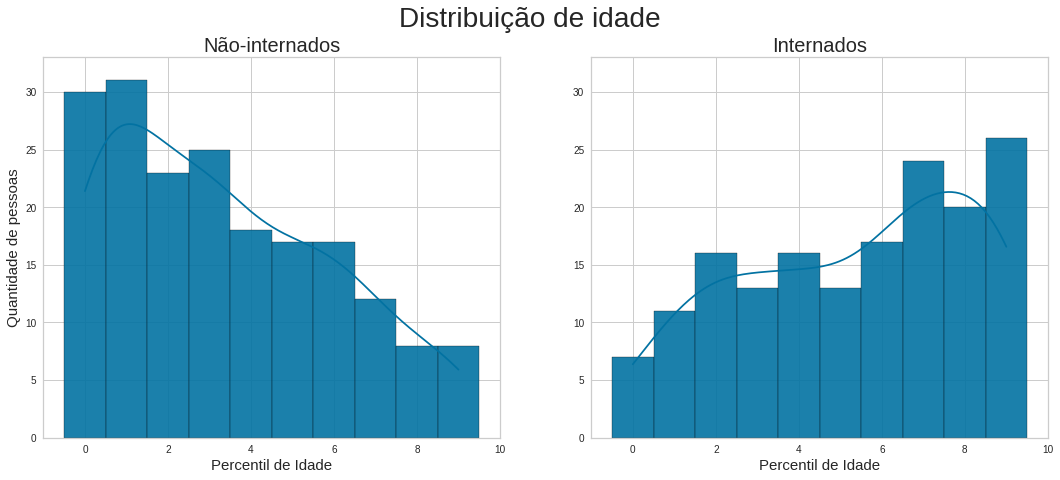

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18,7))


sns.histplot(dados_limpos[dados_limpos['ICU'] == 0]["AGE_PERCENTIL"], 
             kde=True, ax=ax1, discrete=True, alpha = 0.9)

sns.histplot(dados_limpos[dados_limpos['ICU'] == 1]["AGE_PERCENTIL"], 
             kde=True, ax=ax2, discrete=True, alpha = 0.9)

plt.suptitle("Distribuição de idade", fontsize = 28)
ax1.set_title("Não-internados", fontsize = 20)
ax2.set_title("Internados", fontsize = 20)

ax1.set_ylabel("Quantidade de pessoas", fontsize = 15)
ax2.set_ylabel("")

ax1.set_xlabel("Percentil de Idade", fontsize = 15)
ax2.set_xlabel("Percentil de Idade", fontsize = 15)

ax1.set_ylim(0,33)
ax2.set_ylim(0,33)

plt.show()

Aqui a gente consegue compreender melhor as idades das pessoas que são internadas ou não e vemos que os não-internados tem uma tendência de serem mais jovens, quando entre os internados, tem mais pessoas internadas.

In [ ]:
colunas_condicoes = dados_limpos.columns[1:13].to_list()
colunas_condicoes.remove("AGE_PERCENTIL")

In [ ]:
# Aqui a ideia foi para tentar ver o quanto as colunas de condições que não são #
# mutáveis dos pacientes se relacionam com as entradas na UTI #

def plot_catplots(dataframe, coluna):
  sns.catplot(data=dataframe, kind="count",
              x = coluna, col = "ICU", aspect = 1.3, height = 2.5)
  plt.show()

<h3><b>Breve explicação sobre os gráficos abaixo:</b></h3>

Todos os gráficos da esquerda são com informações daqueles que não foram para UTI. Os gráficos à direita são com as informações daqueles que foram para UTI.

Abaixo de cada gráfico vemos do que se trata aquele gráfico, temos os seguintes gráficos respectivamente:

- **AGE_ABOVE65**: esse valor diz se a pessoa tem mais de 65 anos de idade ou não. O dado 0 significa que a pessoa tem menos de 65 e 1 que a pessoa tem mais de 65.

- **GENDER**: O dado informa sobre o gênero, não fica claro o que o 0 ou 1 significam. 

- **DISEASE GROUPING 1 à 6**: se refere à possibilidade da pessoa ter alguma doença que pode ser consideraça comorbidade, mais uma vez os dados não são especificados sobre seu significado para proteger o anonimato dos participantes;

- **HTN**: é uma sigla para Hypertension, que em português significa Hipertensão. 0 são pacientes que não sofre dessa condição e 1 são pacientes que sofrem hipertensão.

- **IMMUNOCOMPROMISED**: A tradução dessa palavra é Imunocomprometido ou seja, uma pessoa que tem o sistema imunológico comprometido. Se o valor é 1 a pessoa tem o sistema comprometido, enquanto 0 já significa que não tem.

- **OTHER**: A tradução significa 'outro', novamente esse ponto não fica claro exatamente o que significa, mas também com a intenção de não comprometer o anonimato do estudo.

DISCLAIMER: Vale lembrar que os pacientes estudados aqui são uma amostra, eles não necessariamente refletem a população total.

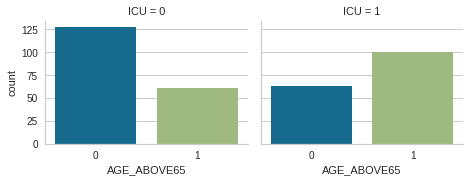

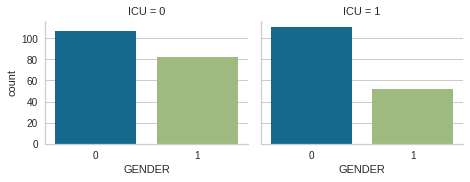

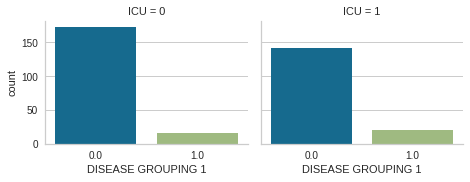

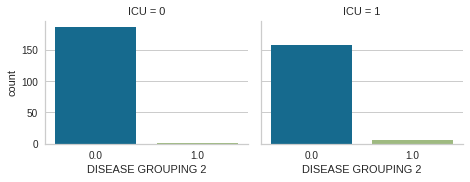

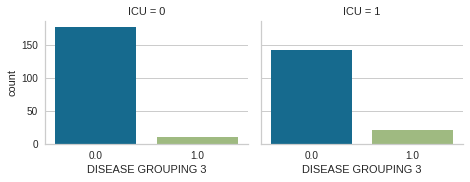

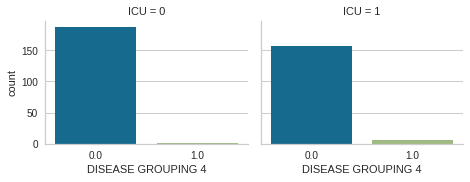

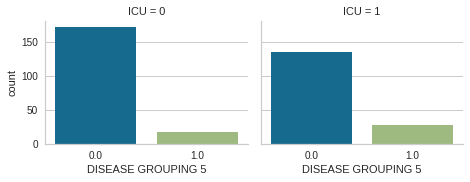

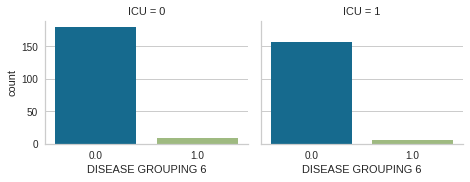

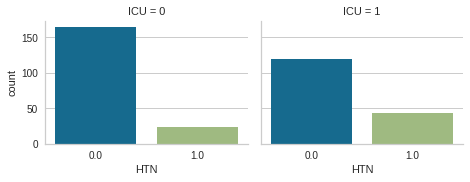

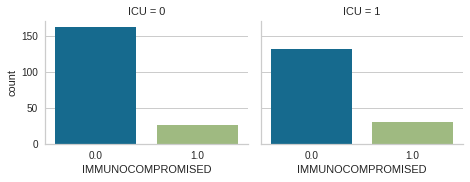

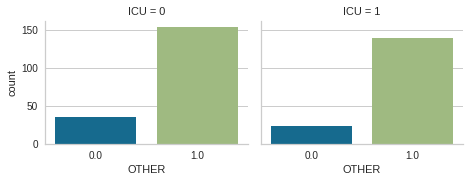

In [ ]:
for coluna in colunas_condicoes: 
  plot_catplots(dados_limpos,coluna)

Os gráficos e a como ele se comportam foram explicados no texto acima deles. 

Abaixo seguem alguns insights sobre os gráficos:

- ABOVE 65: Esse gráfico é o que tem a maior diferença entre todos os feitos aqui. É possível ver que entre os que foram admitidos à UTI, em comparação com aqueles que não foram à UTI, o número de pessoas que tem mais de 65 anos é muito maior.

- GENDER: Em relação à gênero é possível ver que a quantidade total do gênero 0 que foram internados no hospital é maior que gênero 1. Na comparação de quem foi à UTI ou não, o gênero 0 também é mais constante do que quando não foram à UTI.

- DISEASE GROUPING 1 à 5: Em todos esses Disease Grouping a quantidade de pessoas com a doença fica maior quando são pessoas que foram à UTI. Somente o Disease Grouping 3 e 5 tiveram um crescimento maior de quem não foi para UTI para aqueles que foram para UTI.

- DISEASE GROUPING 6: A quantidade de pessoas que fazem parte desse grupo é maior quando a pessoa não vai à UTI do que quando vão à UTI.

- HTN: Os pacientes com hipertensão tiveram uma quantidade maior quando estão entre aqueles que foram à UTI do que quando não foram admitidos à UTI.

- IMMUNOCOMPROMISED: A diferença é pequena, mas a quantidade de pessoas que são imunocomprometidos aumenta quando levamos em conta as pessoas que estão em UTI.

- OTHER: A quantidade de pessoas que tem uma outra condição diminui quando levamos em conta aqueles que foram para UTI.

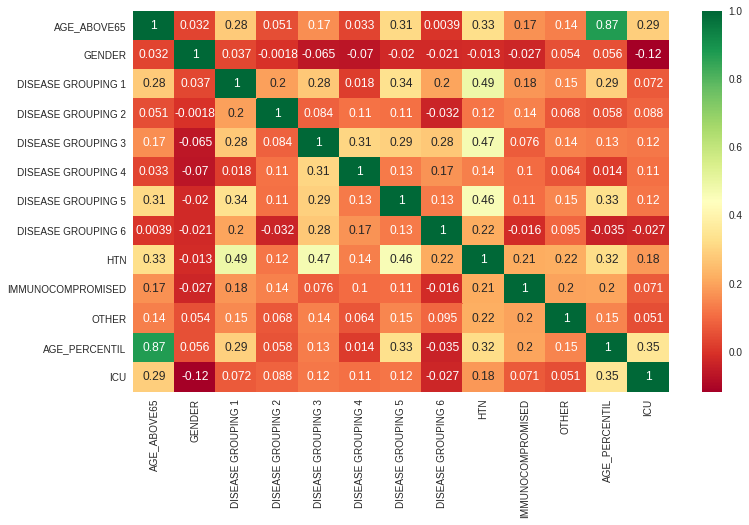

In [ ]:
colunas_condicoes.append("AGE_PERCENTIL")
colunas_condicoes.append("ICU")
plt.figure(figsize=(12,7))
sns.heatmap(dados_limpos[colunas_condicoes].corr(), annot= True, 
            cmap = sns.color_palette("RdYlGn", as_cmap=True))
plt.show()

Na tentativa de ver se existe alguma correlação entre os dados selecionados como condições e pessoais. Assim como também se a pessoa foi à UTI. As correlação em grande parte são muito baixas, as mais altas ficam em volta de 0.3 e 0.4, dentre as correlações negativas o valor mais relevante é -0.12.

## Estudo de Classificação

### Criação e seleção de modelos

A ideia nesse momento é de fato tentar atingir os dois objetivos propostos nesse estudo, predizer quem necessitará de uma UTI e quem não precisará.

Dessa forma, será iniciada a criação e testagem de modelos de classificação, ou seja, que processe os dados clinicos e demográficos e classifique se com aqueles dados a pessoa necessitará de uma UTI ou não.

In [ ]:
## Preparação dos dados ##

In [ ]:
# Boa parte do tratamento já foi feito anteriormente, uma etapa que ainda não foi
#é a etapa de remoção de colunas com alta correlação.
###################################
# Essa etapa se faz necessária, pois se dois dados tem uma alta correlação entre si,
#eles são subjacentes de um único valor. Nesse sentido, a ideia é retirá-los para
#reduzir o viés que os valores podem atribuir ao modelo.

def remove_coluna_corr(dados, valor_corte):

  matrix_corr = dados.iloc[:,4:-2].corr().abs()
  matrix_superior = matrix_corr.where(np.triu(np.ones(matrix_corr.shape),k=1).astype(np.bool))
  excluir = [coluna for coluna in matrix_superior.columns if any(matrix_superior[coluna] >= valor_corte)]

  return dados.drop(columns = excluir)

In [ ]:
# aplicação da função

dados_limpos_sem_corr = remove_coluna_corr(dados_limpos, 0.95)

In [ ]:
# Verificação se ainda existem dados NaN

print("Valores NaN = {}.".format(dados_limpos_sem_corr.isna().sum().sum()))

Valores NaN = 0.


In [ ]:
print("Quantidade de colunas antes da limpeza de correlações: {}.".format(dados_limpos.shape[1]))
print("Quantidade de colunas depois da limpeza de correlações: {}.".format(dados_limpos_sem_corr.shape[1]))
print("Quantidade de colunas retiradas depois da limpeza de correlações: {}.".format(dados_limpos.shape[1] - dados_limpos_sem_corr.shape[1]))

Quantidade de colunas antes da limpeza de correlações: 230.
Quantidade de colunas depois da limpeza de correlações: 98.
Quantidade de colunas retiradas depois da limpeza de correlações: 132.


O total colunas com alta correlação que foram retiradas foram 132, deixando somente colunas 98 colunas para serem avaliadas

In [ ]:
# Colocar a coluna de número de paciente como index para que o valor não seja levado em consideração #

dados_limpos_sem_corr.set_index("PATIENT_VISIT_IDENTIFIER", inplace = True)

In [ ]:
### Início da construção de modelos ###

In [ ]:
# Gerar tabela para de modelos com os dados existentes para avaliá-los.

classification = setup(data = dados_limpos_sem_corr, target = 'ICU',
                       preprocess=False, session_id = 63764)

# Dentre os métodos de avaliação de precisão, o escolhido foi AUC, pois ele permite uma visão coerente de quão bom o resultado é
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7073,0.7920,0.6265,0.7248,0.6553,0.4057,0.4222,0.318
et,Extra Trees Classifier,0.6948,0.7719,0.6068,0.6987,0.6395,0.3789,0.3904,0.468
rf,Random Forest Classifier,0.6748,0.7661,0.6068,0.6660,0.6146,0.3393,0.3557,0.491
gbc,Gradient Boosting Classifier,0.6623,0.7342,0.6523,0.6398,0.6330,0.3223,0.3380,0.164
knn,K Neighbors Classifier,0.6545,0.7105,0.5008,0.6567,0.5533,0.2881,0.3012,0.120
lda,Linear Discriminant Analysis,0.6252,0.7012,0.5364,0.5794,0.5460,0.2374,0.2392,0.027
ada,Ada Boost Classifier,0.6298,0.6780,0.6242,0.5995,0.5979,0.2586,0.2687,0.179
nb,Naive Bayes,0.5650,0.6707,0.0977,0.5167,0.1619,0.0569,0.0934,0.023
dt,Decision Tree Classifier,0.6052,0.6041,0.5879,0.5642,0.5651,0.2061,0.2142,0.024
qda,Quadratic Discriminant Analysis,0.5572,0.5598,0.0795,0.4000,0.1295,0.0375,0.0672,0.027


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=63764, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Após rodar esse método de comparação, utilizarei os 3 modelos (Random Forest Classifier, Extra Trees Classifier e Logistic Regression) que apresentaram melhores resultados numa primeira análise.


A ideia agora é criar os modelos, fazer validações, entender a precisão dos modelos quando usado em larga escala, ou seja, usando diversos modelos quais resultados saem melhor. E por fim selecionar qual modelo atende melhor as duas tarefas principais desse estudo (prever admissões à ICU e prever quem não precisará de UTI).



In [ ]:
# Essa função tem a intenção de utilizar o modelo criado, passar pela crossvalidation algumas vezes para compreender os padrões de acurácia do modelo

def roda_modelo_cv(modelo, dados,n_splits, n_repeats):

  # Definição dos dados do DataFrame que serão usados na hora de fazer a validação cruzada 
  np.random.seed(79512)
  dados = dados.sample(frac=1).reset_index(drop = True)
  x_columns = list(dados.columns)
  y = dados['ICU'].copy()
  x = dados[x_columns].drop(['ICU'], axis = 1).copy()

  # Utilização dos metodos do Sklearn para a validação cruzada 

  # RepeatedStratifiedKFold faz a separação dos dados em dados de treino e dados de teste 
  # O Cross_validate faz justamente a validação cruzada do modelo através da separação.
  # O modelo treina com os dados de teste e verifica o seu desempenho de AUC nos dados de teste.
  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=87164)
  resultados = cross_validate(modelo,x,y, cv = cv, scoring="roc_auc", return_train_score=True)

  # Pegar os resultados de AUC para montar valores de AUC médio, AUC médio de treino e o desvio padrão dos AUC.
  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score'])
  auc_std = np.std(resultados['test_score'])

  # Mostrar os valores que essa função montou
  print(f"AUC treino: {auc_medio_treino}")
  print(f"\nAUC médio de teste: {auc_medio}")
  print(f"\nIntervalo de AUC do grupo de teste: {auc_medio - 2 * auc_std} até {auc_medio + 2 * auc_std}")

In [ ]:
modelo_regressao_logistica = LogisticRegression( )
roda_modelo_cv(modelo_regressao_logistica,dados_limpos_sem_corr, 5, 50)

AUC treino: 0.8405497042258478

AUC médio de teste: 0.7575715830962542

Intervalo de AUC do grupo de teste: 0.6459903402583974 até 0.8691528259341109


In [ ]:
modelo_extra_trees = ExtraTreesClassifier()
roda_modelo_cv(modelo_extra_trees,dados_limpos_sem_corr, 5, 50)

AUC treino: 0.9999835693096492

AUC médio de teste: 0.7515337110435794

Intervalo de AUC do grupo de teste: 0.6397750985071394 até 0.8632923235800193


In [ ]:
modelo_random_forest = RandomForestClassifier()
roda_modelo_cv(modelo_random_forest,dados_limpos_sem_corr, 5, 50)

AUC treino: 0.9999831631107593

AUC médio de teste: 0.7816276038299066

Intervalo de AUC do grupo de teste: 0.6801513535018515 até 0.8831038541579617


Todos os modelos tiveram resultados relativamente bons e todos eles bem próximos. Mas dentre todos eles o que se saiu melhor quando rodado em maior escala é o Random Forest, por isso a ideia agora é tentar melhorar os resultados alterando os hiperparametros e realizar um estudo mais aprofundado da sua precisão.

### Modelo Random Forest

Após a seleção do modelo, agora a ideia é fazer

In [ ]:
# Definição dos dados de teste e treino que serão usados para fazer o fit dos dados #

# Atribuição de seed para poder dar reprodutibilidade aos dados grupos dos treino e teste
seed = np.random.seed(79512)
dados_limpos_sem_corr_cv = dados_limpos_sem_corr.sample(frac=1, random_state=seed).reset_index(drop = True).copy()
x_columns = list(dados_limpos_sem_corr_cv.columns)
y = dados_limpos_sem_corr_cv['ICU'].copy()
x = dados_limpos_sem_corr_cv[x_columns].drop(['ICU'], axis = 1).copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed, stratify = y)

In [ ]:
# Lista de valores que serão testados no árvores
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2200, num = 7)]

# Nível máximo de profundidade da árvore
max_depth = [int(x) for x in np.linspace(10, 100, num = 7)]

# Número minimo de amostras necessarias para dividir a folha
min_samples_split = [2, 5, 10, 15, 20]

# Número minimo de amostras necessarias de cada folha
min_samples_leaf = [1, 2, 4, 6]


# O dicionário que será usado na parametrização
search_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

In [ ]:
# Redefinição do modelo para ele não usar os dados do modelo anterior

np.random.seed(5487)
modelo_random_forest = RandomForestClassifier( )

# Definição dos parametros para a Grid Search
parametros_para_search = GridSearchCV(modelo_random_forest, param_grid = search_grid, 
                                      cv = 4, 
                                      n_jobs = -1, 
                                      scoring = "roc_auc"
                                      )

# Essa etapa é bem longa #
%time parametros_para_search = parametros_para_search.fit(x, y)

In [ ]:
parametros_para_search.best_params_

In [ ]:
np.random.seed(12762)


modelo_random_forest = parametros_para_search.best_estimator_
modelo_random_forest.fit(x_train,y_train)
%time roda_modelo_cv(modelo_random_forest, dados_limpos_sem_corr, 5, 50)

In [ ]:
np.random.seed(12762)

modelo_random_forest_padrao = RandomForestClassifier()
modelo_random_forest_padrao.fit(x_train,y_train)
%time roda_modelo_cv(modelo_random_forest_padrao, dados_limpos_sem_corr, 5, 50)

In [ ]:
# Comparação da Confusion Matrix

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))

plot_confusion_matrix(modelo_random_forest_padrao, x_test,y_test, 
                      ax = ax1, cmap = "Blues");
plot_confusion_matrix(modelo_random_forest, x_test,y_test, 
                      ax = ax2, cmap = "Blues");

ax2.set_title("Modelo com parâmetros melhorados", fontsize = 15)
ax1.set_title("Modelo padrão",  fontsize = 15)

ax1.grid('')
ax2.grid('')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))

roc_auc_padrao = ROCAUC(modelo_random_forest_padrao, ax=ax1)
roc_auc = ROCAUC(modelo_random_forest, ax=ax2)

roc_auc_padrao.fit(x_train,y_train)
roc_auc_padrao.score(x_test, y_test)

roc_auc.fit(x_train,y_train)
roc_auc.score(x_test, y_test)

ax1.set_ylabel("True Positive Rate", fontsize = 15)
ax2.set_ylabel("True Positive Rate", fontsize = 15)

ax1.set_xlabel("False Positive Rate", fontsize = 15)
ax2.set_xlabel("False Positive Rate", fontsize = 15)

ax1.legend()
ax2.legend()

ax1.set_title("Modelo padrão",  fontsize = 18)
ax2.set_title("Modelo com parâmetros melhorados", fontsize = 18)

plt.show()

In [ ]:
parametros_para_search.best_params_

In [ ]:
np.random.seed(912762)


modelo_random_forest = parametros_para_search.best_estimator_
modelo_random_forest.fit(x_train,y_train)
%time roda_modelo_cv(modelo_random_forest, dados_limpos_sem_corr, 5, 50)

AUC treino: 0.9965145717315127

AUC médio de teste: 0.7875082910362515

Intervalo de AUC do grupo de teste: 0.6839482076210182 até 0.8910683744514849
CPU times: user 1min 37s, sys: 580 ms, total: 1min 38s
Wall time: 1min 38s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
modelo_random_forest_padrao = RandomForestClassifier()
modelo_random_forest_padrao.fit(x_train,y_train)
%time roda_modelo_cv(modelo_random_forest_padrao, dados_limpos_sem_corr, 5, 50)

AUC treino: 0.9999831631107593

AUC médio de teste: 0.7816276038299066

Intervalo de AUC do grupo de teste: 0.6801513535018515 até 0.8831038541579617
CPU times: user 53.2 s, sys: 282 ms, total: 53.5 s
Wall time: 53.5 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

O tempo dessa etapa foi também muito longo, mas dependendo do resultado pode valer a pena o trade-off do tempo de definição com a performance do modelo. O próximo passo é justamente fazer a comparação do modelo sem a etapa de Hyperparameter Tuning e o modelo final.

Levando em consideração performance e também tempo, uma vez que o tempo é relevante para que o modelo possa ter escalabilidade.

### Métricas do Modelo

O principal objetivo aqui é entender como os meus modelos estão performando e se vale a pena usar o modelo com a mudança de hiperparametros. Mesmo com seu tempo de parametrização bem acima do modelo padrão.

#### Matriz de confusão

A matriz de confusão é uma tabela que mostra as frequências de classificação para cada classe do modelo. A matriz utiliza um modelo que já foi feito o fit e testa em uma amostra e retorna a tabela que mostra como cada um dos valores de testes foram previstos e comparam com as suas classes reais. Essa ferramenta é utilizada para entender quis classes ou predições estão sendo mais confundidas pelo modelo. 

No eixo Y temos os valores reais das classes enquanto no eixo X temos os valores preditos. Os valores dentro de cada quadrante são referentes às combinações de classificações. 

Nela é possível visualizar a relação de Verdadeiros Positivos, Falsos Positivos, Verdadeiros Negativos e Falsos Negativos. 


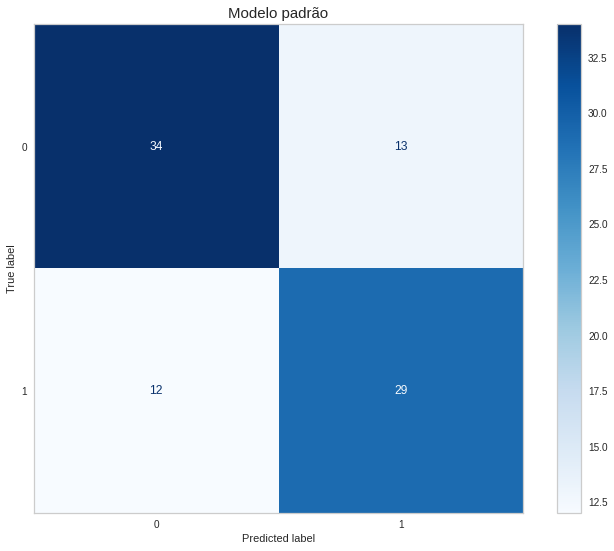

In [ ]:
# Comparação da Confusion Matrix

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))

plot_confusion_matrix(modelo_random_forest_padrao, x_test,y_test, 
                      ax = ax1, cmap = "Blues");
plot_confusion_matrix(modelo_random_forest, x_test,y_test, 
                      ax = ax2, cmap = "Blues");

ax2.set_title("Modelo com parâmetros melhorados", fontsize = 15)
ax1.set_title("Modelo padrão",  fontsize = 15)

ax1.grid('')
ax2.grid('')

Nesse primeiro teste, o modelo padrão performa de forma quase igual ao com os hiperparametros alterados. O modelo com alteração acerta que 30 pessoas necessitarão de UTI, enquanto o modelo padrão acerta somente 29.

#### Curva de ROC/AUC

Um ROCAUC (Receiver Operating Characteristic/Area Under the Curve) permite a visualização do tradeoff entre a sentividade e a especificidade de um modelo de classificação.

Quando disposto visualmente a curva ROC mostra a taxa de Verdadeiros Positivos no eixo Y e a taxa de Falsos Positivos no eixo X, levando em conta a média global e também por classe. O ponto ideal do modelo em um gráfico de ROC então é o topo esquerdo, onde falsos positivos são zero e verdadeiros positivos são 1.

Isso leva à uma outra métrica, o AUC, ou Area Under the Curve (Área abaixo da curva), que é justamente a compilação do relacionamento entre Falsos Positivos e Verdadeiros positivos. Geralmente, quão mais alto é o AUC, melhor o modelo é. Entretando também é importante analisar o quão íngreme é a curva, pois ela descreve a maximização dos verdadeiros positivos e a minimização dos falsos positivos.

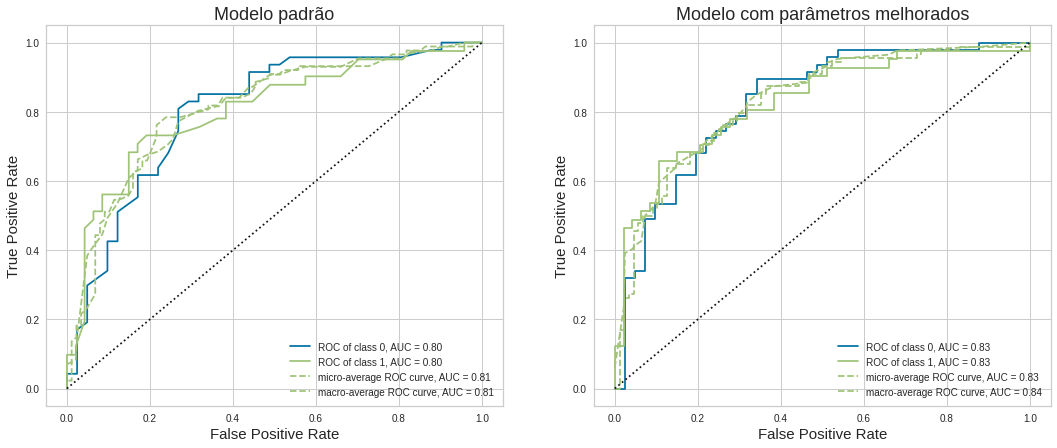

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))

roc_auc_padrao = ROCAUC(modelo_random_forest_padrao, ax=ax1)
roc_auc = ROCAUC(modelo_random_forest, ax=ax2)

roc_auc_padrao.fit(x_train,y_train)
roc_auc_padrao.score(x_test, y_test)

roc_auc.fit(x_train,y_train)
roc_auc.score(x_test, y_test)

ax1.set_ylabel("True Positive Rate", fontsize = 15)
ax2.set_ylabel("True Positive Rate", fontsize = 15)

ax1.set_xlabel("False Positive Rate", fontsize = 15)
ax2.set_xlabel("False Positive Rate", fontsize = 15)

ax1.legend()
ax2.legend()

ax1.set_title("Modelo padrão",  fontsize = 18)
ax2.set_title("Modelo com parâmetros melhorados", fontsize = 18)

plt.show()

#### Relatório de Classificação

O relatório de classificação disponibiliza as métricas de precisão, recall, f1 e a quantidade de variáveis usadas na estipulação das métricas do modelo.

**Precisão**

Essa medida pode ser vista como a medida de exatidão do classificador. Para cada classe ele é definido como a proporção de verdadeiros positivos para o total da soma de verdadeiros positivos e falsos positivos. Em outras palavras: "De todas as classificações positivas, qual a porcentagem de acerto?"

**Recall**

O recall é a métrica do quão completo o classificador é, em outras palavras, de classificar corretamente todas as classes positivas. Para cada classe, ela é definida como a proporção de verdadeiros positivos com a soma de verdadeiros positivos e falsos negativos. Em outras palavras: "Para todos os valores que era de fato positivo, quantos porcento foram classificados corretamente?"

**F1-Score** 

O F1 score é uma média ponderada harmônica da precisão e do recall, de forma que o melhor resultado seja 1.0 e o pior 0.0. Geralmente, os resultados deste são menores que as medidas de acurácia uma vez que ele levam os valores de precisão e recall para fazer o seu score. De forma geral, o score do f1 não deve ser usado para analisar a acurácia geral, mas sim para comparar os classificadores.

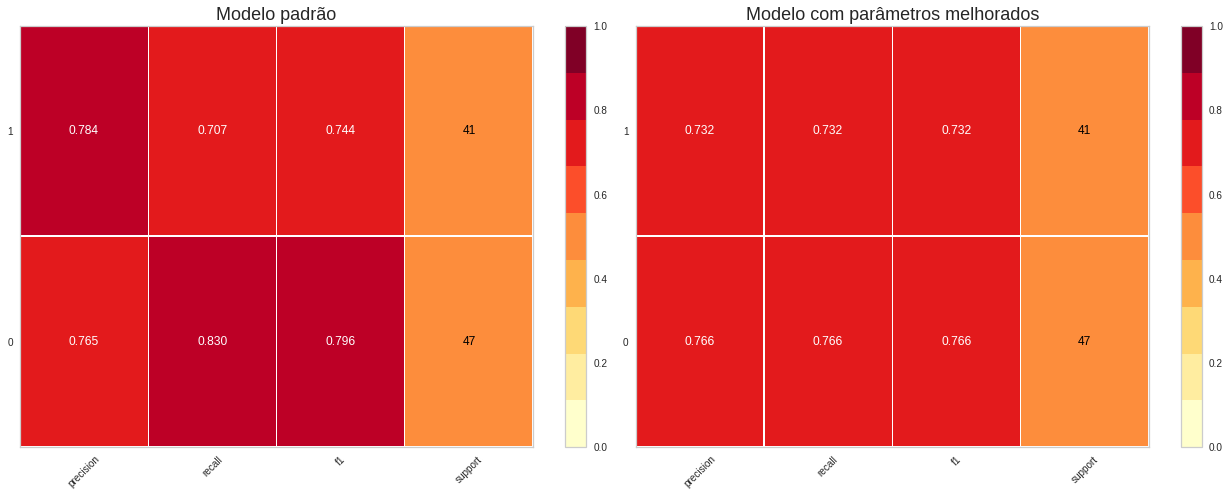

In [ ]:
# Visualizar o relatório de classificação.

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))

cr_padrao = ClassificationReport(modelo_random_forest_padrao, ax=ax1, support=True)
cr = ClassificationReport(modelo_random_forest, ax=ax2, support=True)

cr_padrao.fit(x_train,y_train)
cr_padrao.score(x_test, y_test)

cr.fit(x_train,y_train)
cr.score(x_test, y_test)

cr_padrao.finalize()
cr.finalize()

ax1.set_title("Modelo padrão",  fontsize = 18)
ax2.set_title("Modelo com parâmetros melhorados", fontsize = 18)

plt.show()

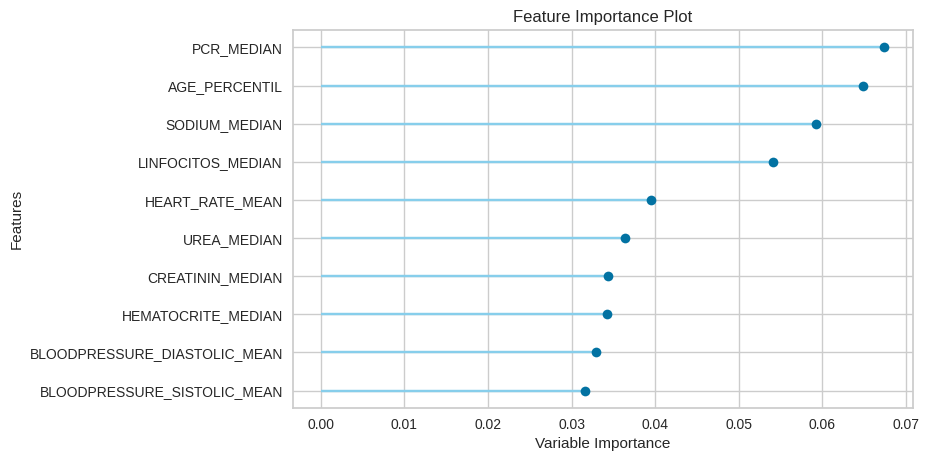

In [ ]:
plot_model(modelo_random_forest,'feature')

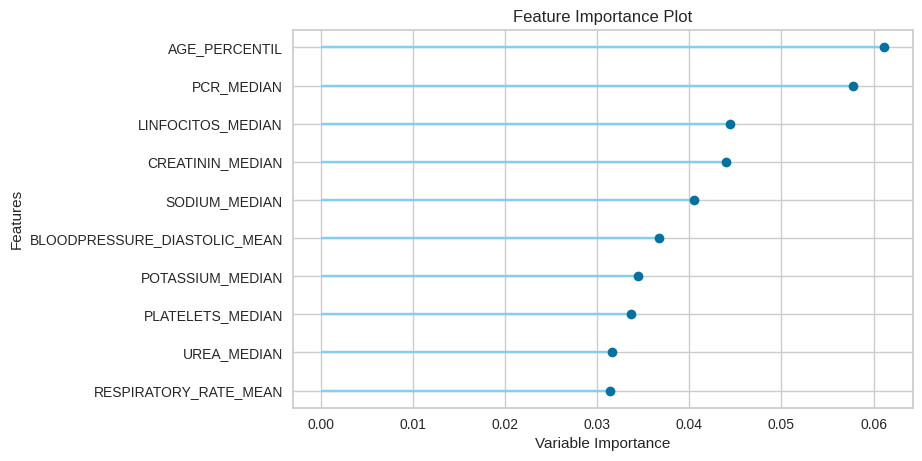

In [ ]:
plot_model(modelo_random_forest_padrao,'feature')

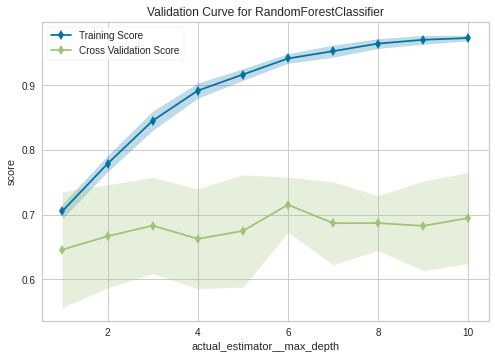

In [ ]:
plot_model(modelo_random_forest,'vc')

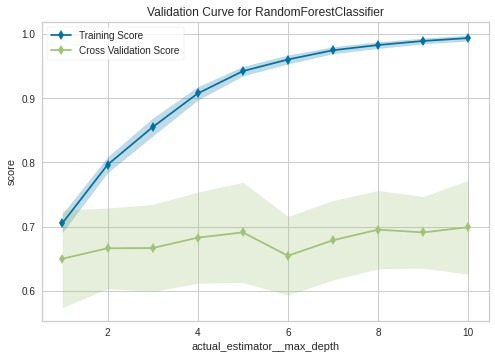

In [ ]:
plot_model(modelo_random_forest_padrao,'vc')

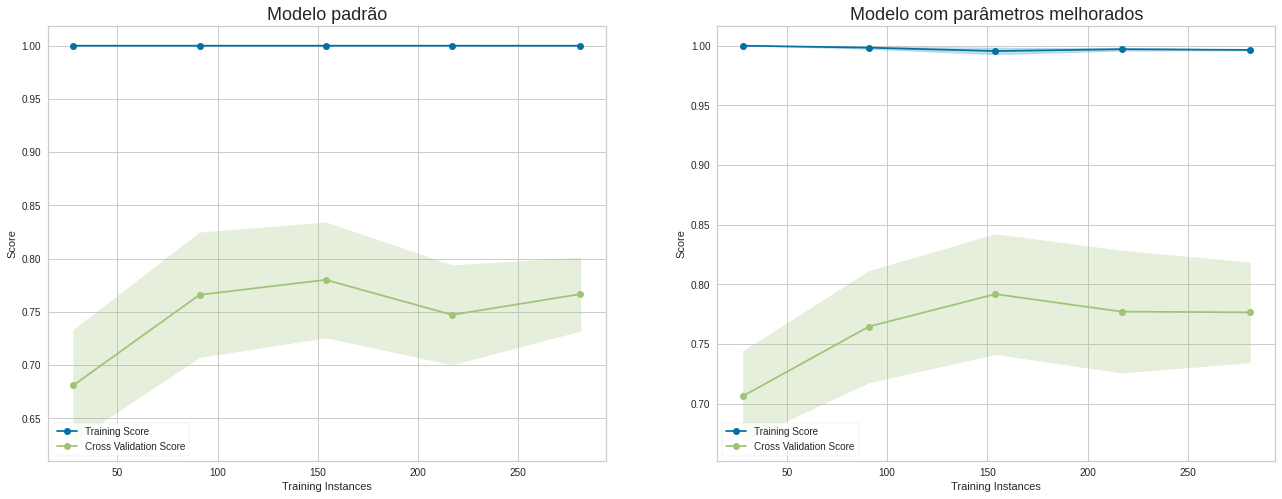

In [ ]:
cv = StratifiedKFold(random_state=14116)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (22,8))

visualizer_padrao = LearningCurve(modelo_random_forest_padrao, cv=cv, scoring = "roc_auc", n_jobs=4, ax=ax1)
visualizer_padrao.fit(x,y)
visualizer_padrao.finalize()

visualizer = LearningCurve(modelo_random_forest, cv=cv, scoring = "roc_auc", n_jobs=4, ax=ax2)
visualizer.fit(x,y)
visualizer.finalize()

ax1.set_title("Modelo padrão",  fontsize = 18)
ax2.set_title("Modelo com parâmetros melhorados", fontsize = 18)

plt.show()

#### Comparativo Scores

Comparativo de resultados de treino com resultados de teste

In [ ]:
def roda_modelo_treino_test(modelo, dados,n_splits, n_repeats):

  np.random.seed(79512)
  dados = dados.sample(frac=1).reset_index(drop = True)
  x_columns = list(dados.columns)
  y = dados['ICU'].copy()
  x = dados[x_columns].drop(['ICU'], axis = 1).copy()

  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
  resultados = cross_validate(modelo,x,y, cv = cv, scoring="roc_auc", return_train_score=True)

  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score'])
  auc_std = np.std(resultados['test_score'])

  #print(f"AUC treino: {auc_medio_treino}")
  #print(f"\nAUC médio: {auc_medio}")
  #print(f"\nIntervalo: {auc_medio - 2 * auc_std} até {auc_medio + 2 * auc_std}")
  return resultados['train_score'],resultados['test_score']

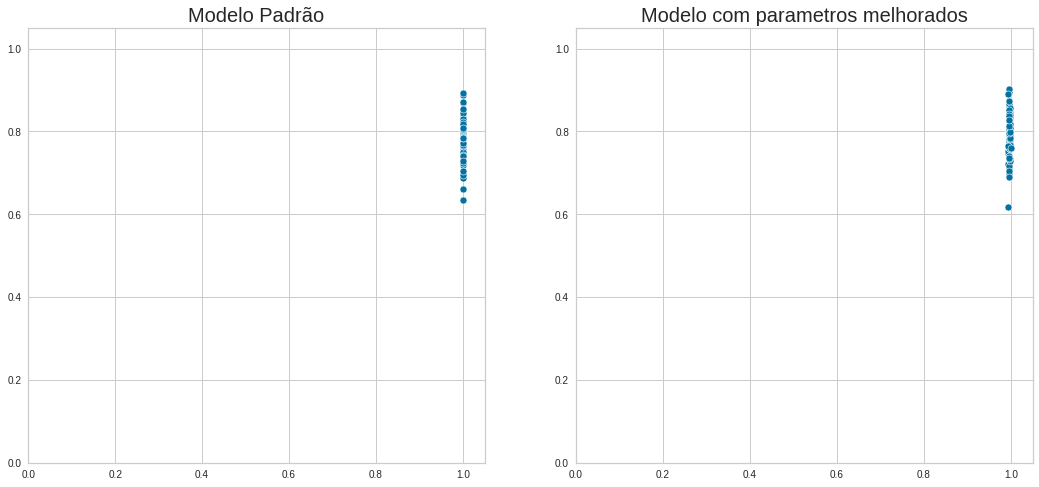

In [ ]:
treino_padrao, test_padrao = roda_modelo_treino_test(modelo_random_forest_padrao,dados_limpos_sem_corr, 5,20)
treino, test = roda_modelo_treino_test(modelo_random_forest,dados_limpos_sem_corr, 5,20)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,8))

sns.scatterplot(x = treino_padrao, y = test_padrao, ax=ax1)
sns.scatterplot(x = treino, y = test, ax=ax2)

ax1.set_xlim(0,1.05)
ax1.set_ylim(0,1.05)

ax2.set_xlim(0,1.05)
ax2.set_ylim(0,1.05)

ax1.set_title("Modelo Padrão", fontsize = 20)
ax2.set_title("Modelo com parametros melhorados", fontsize = 20)


plt.show()

Por fim, foi possível avaliar que o estudo realizado e o modelo criado ajudam na preparação dos leitos na antecipação da necessidade de leitos dependendo da quantidade de entradas no hospital, assim como também prever quem pode precisar de um leito de UTI uma vez que as existem os dados clínicos dos pacientes.